In [14]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import matplotlib
import scipy.optimize as opt
from sklearn.metrics import classification_report

In [167]:
data = sio.loadmat('ex3data1.mat')
data #dict类型

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [169]:
X = np.array([im.reshape((20, 20)).T for im in data['X']])
        # and I flat the image again to preserve the vector presentation
figs  = np.array([im.reshape(400) for im in X])
nums = data['y'].reshape(data['y'].shape[0])
print(figs.shape,nums.shape)

(5000, 400) (5000,)


In [170]:
def draw_one_picture(picture,length_x,length_y):
    fig, ax = plt.subplots(figsize=(1, 1))
    ax.matshow(picture.reshape(length_x,length_y),cmap=matplotlib.cm.binary)
    plt.xticks([])
    plt.yticks([])

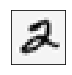

In [171]:
draw_one_picture(figs[1000,:],20,20)

In [172]:
def draw_hundred_picture(pictures,length_x,length_y):
    fig, ax = plt.subplots(nrows=10, ncols=10,sharey=True, sharex=True, figsize=(8, 8))
    #numpy.random.choice(a, size=None, replace=True, p=None)
    #从a(只要是ndarray都可以，但必须是一维的)中随机抽取数字，并组成指定大小(size)的数组
    #replace:True表示可以取相同数字，False表示不可以取相同数字
    #数组p：与数组a相对应，表示取数组a中每个元素的概率，默认为选取每个元素的概率相同。
    fig_choice_index = np.random.choice(np.arange(pictures.shape[0]),100)
    fig_choices = pictures[fig_choice_index,:]
    for i in range(10):
        for j in range(10):
            ax[i,j].matshow(fig_choices[i*10+j].reshape(length_x,length_y),cmap=matplotlib.cm.binary)
    plt.xticks([])
    plt.yticks([])

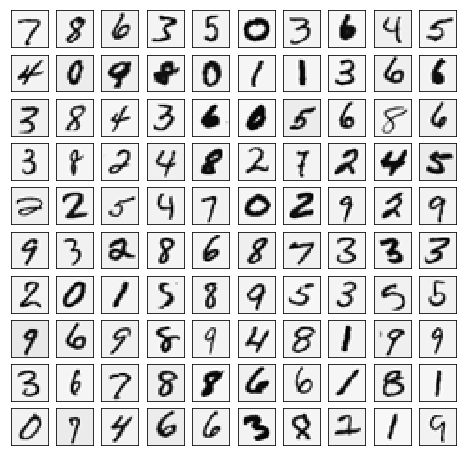

In [173]:
draw_hundred_picture(figs,20,20)

In [174]:
# 为x插入1
x = np.insert(figs,0,np.ones(figs.shape[0]),1)

In [175]:
# 将y转变为0100000000这种
y_matrix = []
for i in range(1,11):
    y_matrix.append((nums == i).astype(int))
y_matrix = [y_matrix[-1]] + y_matrix[:-1]
y = np.array(y_matrix)

In [176]:
y

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 1]])

In [177]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
    #return .5 * (1 + np.tanh(.5 * z))

In [178]:
def costFunction_regularized(theta,x,y,learn_rate):
    y_predict = sigmoid(x@theta)
    inner_sum = y*np.log(y_predict) + (1-y)*np.log(1-y_predict)
    cost = -np.sum(inner_sum)/len(x)
    regular = learn_rate / 2 /len(x) * np.sum(theta[1:]*theta[1:])
    return  cost + regular

In [190]:
theta = np.zeros(x.shape[1])
costFunction_regularized(theta,x,y[9],1)

0.6931471805599454

In [180]:
def regularized_gradient(theta, X, y, l=1):
    grad = (1 / len(X)) * X.T @ (sigmoid(X @ theta) - y) + ((l / len(X)) * theta)
    # intercept gradient is not regularized
    grad[0] = (1 / len(X)) * (X[:,0].T @ (sigmoid(X @ theta) - y))
    return grad

In [187]:
theta = np.zeros(x.shape[1])
regularized_gradient(theta, x, y[0], l=1)


array([ 0.4       ,  0.        ,  0.00000002, -0.00000021, -0.00000088,
       -0.00000103,  0.00001336,  0.00002685, -0.00000532, -0.00002268,
       -0.00009014, -0.00019876, -0.00027929, -0.00038123, -0.00029116,
       -0.00010657, -0.00001263, -0.00000119, -0.00000268,  0.00000011,
        0.        ,  0.        , -0.0000002 ,  0.0000022 ,  0.00000001,
       -0.00002612,  0.00002374,  0.00018989,  0.00034416,  0.00043744,
        0.0009588 ,  0.00206469,  0.00369932,  0.00429586,  0.00302095,
        0.00139761,  0.00036178,  0.00000281, -0.00001173, -0.00000143,
        0.00000015,  0.00000008, -0.00000083, -0.00001013,  0.0000244 ,
        0.00024201,  0.00089245,  0.00258772,  0.00584103,  0.01014185,
        0.01554392,  0.02296884,  0.02815358,  0.02632918,  0.01758638,
        0.00857708,  0.00290144,  0.00089759,  0.00010167, -0.00004778,
       -0.00000202, -0.00000094, -0.00000262,  0.00006836,  0.0008871 ,
        0.00295202,  0.00784176,  0.01656549,  0.03106084,  0.04

In [183]:
# 训练一个分类器，总共需要分10个
def logistic_regression(X, y, l=1):
    theta = np.zeros(X.shape[1])
    res = opt.minimize(fun=costFunction_regularized,
                       x0=theta,
                       args=(X, y, l),
                       method='TNC',
                       jac=regularized_gradient,
                       options={'disp': True})
    final_theta = res.x
    return final_theta

In [184]:
def predict(x, theta):
    prob = sigmoid(x @ theta)
    return (prob >= 0.5).astype(int)

In [186]:
theta0 = logistic_regression(x,y[0],1)
theta0

array([-5.4039781 ,  0.        , -0.        ,  0.00000001,  0.00000005,
       -0.00001229, -0.00006722,  0.00215439,  0.00280211,  0.00102243,
        0.00029686, -0.0036906 , -0.00789261,  0.02602872,  0.01603747,
        0.00004085,  0.00048639,  0.00018498, -0.00002184, -0.00000003,
        0.        ,  0.        , -0.00000877,  0.00005489,  0.00047393,
        0.00066935,  0.00205508, -0.01701107, -0.0233002 , -0.01391402,
       -0.05620373, -0.06419323, -0.19700071, -0.37073793, -0.18190463,
       -0.0337619 , -0.00818038, -0.00028203, -0.00428936,  0.00018137,
       -0.00000925, -0.        , -0.00001474, -0.00004722,  0.002045  ,
        0.00588527, -0.01095442, -0.18985455, -0.46334349, -0.67794362,
       -0.34822773,  0.00446451, -0.4608694 , -0.286504  , -0.13108472,
       -0.17251665, -0.34685017, -0.08383942,  0.03831091,  0.00194076,
       -0.00004214, -0.00000671,  0.00110061, -0.00490216, -0.06483625,
       -0.10798536, -0.16765058, -0.42674229, -0.53787726, -0.26

In [104]:
y_pred = predict(x, theta0)
y_pred.shape
print('Accuracy={}'.format(np.mean(y[0] == y_pred)))

Accuracy=0.9974


In [193]:
k_theta = np.array([logistic_regression(x,y[k],1) for k in range(10)])
print(k_theta)

[[-5.4039781   0.         -0.         ... -0.00023223  0.00049228
   0.        ]
 [-2.38302197  0.         -0.         ...  0.00023582  0.00001641
   0.        ]
 [-3.18502457  0.         -0.0000016  ...  0.00212694 -0.00014818
   0.        ]
 ...
 [-1.90487359  0.         -0.         ... -0.02769418  0.00123727
   0.        ]
 [-7.98959926  0.         -0.         ...  0.00875676 -0.00063857
   0.        ]
 [-4.57061765  0.         -0.00000002 ... -0.0009838  -0.00122506
   0.        ]]


In [ ]:
k_theta

## 进行预测

In [195]:
predict_y_10 = sigmoid(x@k_theta.T)
np.set_printoptions(suppress=True)
predict_y_10

array([[0.99577663, 0.        , 0.00053469, ..., 0.00006465, 0.00003897,
        0.00172136],
       [0.99834481, 0.0000001 , 0.00005607, ..., 0.00009674, 0.0000029 ,
        0.00008487],
       [0.99140123, 0.        , 0.00056852, ..., 0.00000655, 0.02653777,
        0.00197552],
       ...,
       [0.00000068, 0.04144684, 0.00321073, ..., 0.00012715, 0.00296909,
        0.7075675 ],
       [0.00001843, 0.00000013, 0.00000009, ..., 0.00164875, 0.06813998,
        0.86123088],
       [0.02880471, 0.        , 0.00012968, ..., 0.36616924, 0.0049734 ,
        0.14817507]])

In [197]:
y_pred = np.argmax(predict_y_10, axis=1)

In [198]:
y_pred

array([0, 0, 0, ..., 9, 9, 7], dtype=int64)

In [200]:
def load_weight(path):
    data = sio.loadmat(path)
    return data['Theta1'], data['Theta2']

In [203]:
theta1, theta2 = load_weight('ex3weights.mat')
print(theta1.shape,theta2.shape)

(25, 401) (10, 26)


In [205]:
X = data['X']
X = np.insert(X, 0, values=np.ones(X.shape[0]), axis=1)  # intercept
y = data['y']
X.shape, y.shape

((5000, 401), (5000, 1))

In [207]:
output_1 = X @ theta1.T
output_1.shape

(5000, 25)

In [208]:
ourput_2 = np.insert(output_1, 0, values=np.ones(X.shape[0]), axis=1) @ theta2.T

In [210]:
y_pred = np.argmax(ourput_2, axis=1) + 1  # numpy is 0 base index, +1 for matlab convention，返回沿轴axis最大值的索引，axis=1代表行
y_pred.shape

(5000,)

In [211]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.19      0.32       500
           2       0.96      0.73      0.83       500
           3       0.85      0.83      0.84       500
           4       0.98      0.74      0.84       500
           5       1.00      0.23      0.37       500
           6       0.95      0.89      0.92       500
           7       0.99      0.65      0.78       500
           8       0.28      1.00      0.44       500
           9       0.80      0.76      0.78       500
          10       0.95      0.95      0.95       500

    accuracy                           0.70      5000
   macro avg       0.88      0.70      0.71      5000
weighted avg       0.88      0.70      0.71      5000

